In [98]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [99]:
!cp "/content/drive/MyDrive/Colab Notebooks/London/london_weather.csv" "/content/londonweather.csv"

In [100]:
df = pd.read_csv('/content/londonweather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [101]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [102]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df[:25]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


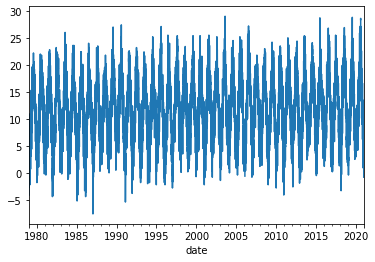

In [103]:
temp = df['mean_temp']
temp.plot()

In [104]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
df['mean_temp'] = df['mean_temp'].interpolate()

In [105]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [106]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((15311, 30, 1), (15311,))

In [107]:
X_train1, y_train1 = X1[:12248], y1[:12248]
X_val1, y_val1 = X1[12248:13780], y1[12248:13780]
X_test1, y_test1 = X1[13780:], y1[13780:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((12248, 30, 1), (12248,), (1532, 30, 1), (1532,), (1531, 30, 1), (1531,))

In [108]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(InputLayer((30, 1)))
model3.add(GRU(64))
model3.add(Dense(32, 'relu'))
model3.add(Dense(32, 'relu'))
model3.add(Dense(16, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                12864     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0
_________________________________________________________________


In [109]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [110]:
history1 = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp3])

Epoch 1/30
382/383 [============================>.] - ETA: 0s - loss: 97.3458 - root_mean_squared_error: 9.8664

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 13s 28ms/step - loss: 97.2214 - root_mean_squared_error: 9.8601 - val_loss: 37.1378 - val_root_mean_squared_error: 6.0941
Epoch 2/30
383/383 [==============================] - ETA: 0s - loss: 12.8747 - root_mean_squared_error: 3.5881

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 12.8747 - root_mean_squared_error: 3.5881 - val_loss: 4.7173 - val_root_mean_squared_error: 2.1719
Epoch 3/30
383/383 [==============================] - ETA: 0s - loss: 4.0309 - root_mean_squared_error: 2.0077

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 11s 29ms/step - loss: 4.0309 - root_mean_squared_error: 2.0077 - val_loss: 3.5550 - val_root_mean_squared_error: 1.8855
Epoch 4/30
381/383 [============================>.] - ETA: 0s - loss: 3.6758 - root_mean_squared_error: 1.9172

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.6785 - root_mean_squared_error: 1.9179 - val_loss: 3.4237 - val_root_mean_squared_error: 1.8503
Epoch 5/30
382/383 [============================>.] - ETA: 0s - loss: 3.6032 - root_mean_squared_error: 1.8982

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.6016 - root_mean_squared_error: 1.8978 - val_loss: 3.3882 - val_root_mean_squared_error: 1.8407
Epoch 6/30
383/383 [==============================] - ETA: 0s - loss: 3.5523 - root_mean_squared_error: 1.8847

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.5523 - root_mean_squared_error: 1.8847 - val_loss: 3.3655 - val_root_mean_squared_error: 1.8345
Epoch 7/30
381/383 [============================>.] - ETA: 0s - loss: 3.5296 - root_mean_squared_error: 1.8787

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.5276 - root_mean_squared_error: 1.8782 - val_loss: 3.3555 - val_root_mean_squared_error: 1.8318
Epoch 8/30
383/383 [==============================] - ETA: 0s - loss: 3.5058 - root_mean_squared_error: 1.8724

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 12s 32ms/step - loss: 3.5058 - root_mean_squared_error: 1.8724 - val_loss: 3.3443 - val_root_mean_squared_error: 1.8288
Epoch 9/30
381/383 [============================>.] - ETA: 0s - loss: 3.4922 - root_mean_squared_error: 1.8687

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.4905 - root_mean_squared_error: 1.8683 - val_loss: 3.3438 - val_root_mean_squared_error: 1.8286
Epoch 10/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4857 - root_mean_squared_error: 1.8670 - val_loss: 3.3733 - val_root_mean_squared_error: 1.8366
Epoch 11/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4795 - root_mean_squared_error: 1.8653 - val_loss: 3.3444 - val_root_mean_squared_error: 1.8288
Epoch 12/30
383/383 [==============================] - ETA: 0s - loss: 3.4699 - root_mean_squared_error: 1.8628

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.4699 - root_mean_squared_error: 1.8628 - val_loss: 3.3300 - val_root_mean_squared_error: 1.8248
Epoch 13/30
383/383 [==============================] - 10s 26ms/step - loss: 3.4713 - root_mean_squared_error: 1.8631 - val_loss: 3.3395 - val_root_mean_squared_error: 1.8274
Epoch 14/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4653 - root_mean_squared_error: 1.8615 - val_loss: 3.3449 - val_root_mean_squared_error: 1.8289
Epoch 15/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4667 - root_mean_squared_error: 1.8619 - val_loss: 3.3547 - val_root_mean_squared_error: 1.8316
Epoch 16/30
380/383 [============================>.] - ETA: 0s - loss: 3.4698 - root_mean_squared_error: 1.8627

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.4623 - root_mean_squared_error: 1.8607 - val_loss: 3.3298 - val_root_mean_squared_error: 1.8248
Epoch 17/30
382/383 [============================>.] - ETA: 0s - loss: 3.4571 - root_mean_squared_error: 1.8593

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.4554 - root_mean_squared_error: 1.8589 - val_loss: 3.3282 - val_root_mean_squared_error: 1.8243
Epoch 18/30
381/383 [============================>.] - ETA: 0s - loss: 3.4579 - root_mean_squared_error: 1.8595

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.4569 - root_mean_squared_error: 1.8593 - val_loss: 3.3274 - val_root_mean_squared_error: 1.8241
Epoch 19/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4630 - root_mean_squared_error: 1.8609 - val_loss: 3.3900 - val_root_mean_squared_error: 1.8412
Epoch 20/30
381/383 [============================>.] - ETA: 0s - loss: 3.4527 - root_mean_squared_error: 1.8581

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


383/383 [==============================] - 10s 27ms/step - loss: 3.4553 - root_mean_squared_error: 1.8588 - val_loss: 3.3198 - val_root_mean_squared_error: 1.8220
Epoch 21/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4610 - root_mean_squared_error: 1.8604 - val_loss: 3.3467 - val_root_mean_squared_error: 1.8294
Epoch 22/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4478 - root_mean_squared_error: 1.8568 - val_loss: 3.3560 - val_root_mean_squared_error: 1.8319
Epoch 23/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4619 - root_mean_squared_error: 1.8606 - val_loss: 3.3725 - val_root_mean_squared_error: 1.8364
Epoch 24/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4622 - root_mean_squared_error: 1.8607 - val_loss: 3.3509 - val_root_mean_squared_error: 1.8305
Epoch 25/30
383/383 [==============================] - 6s 17ms/step - loss: 3.4622 - root_mean_squared_error: 1.8607 - val_loss: 3.3288 - val

In [111]:
from tensorflow.keras.models import load_model
model3 = load_model('model3/')

In [112]:
train_predictions1 = model3.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,0.988021,2.1
1,2.822051,5.2
2,5.871896,2.8
3,2.490899,0.9
4,1.304276,1.6
...,...,...
12243,15.936701,19.2
12244,19.171009,19.8
12245,19.285294,20.9
12246,20.228832,19.4


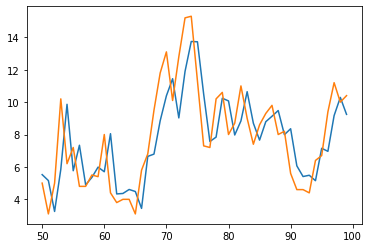

In [113]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [114]:
val_predictions1 = model3.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,20.516483,19.2
1,18.799274,21.2
2,20.675224,20.5
3,19.957937,19.4
4,19.111816,23.2
...,...,...
1527,13.693683,11.8
1528,12.010397,11.2
1529,11.661857,11.6
1530,12.005726,10.4


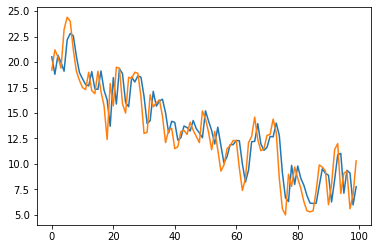

In [115]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [116]:
test_predictions1 = model3.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,10.372596,10.0
1,10.517866,11.4
2,11.635162,11.8
3,11.777687,13.0
4,12.806305,12.2
...,...,...
1526,6.440521,7.5
1527,7.887303,1.1
1528,1.504880,2.6
1529,4.154461,2.7


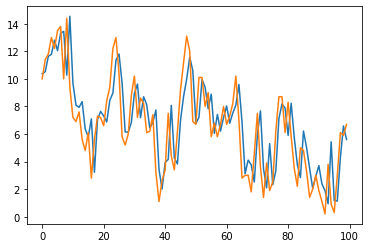

In [117]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

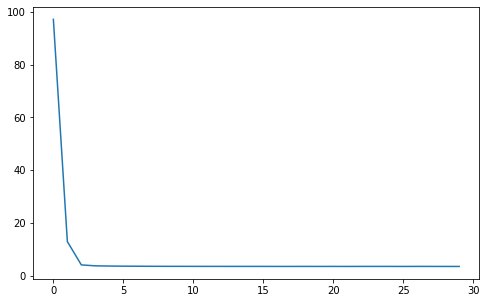

In [118]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

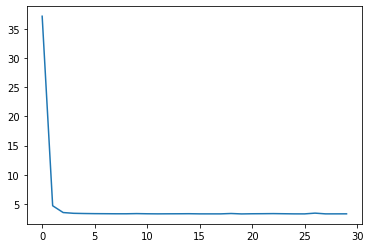

In [119]:
plt.plot(history1.history['val_loss'])

In [120]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       10.372596     10.0
 1       10.517866     11.4
 2       11.635162     11.8
 3       11.777687     13.0
 4       12.806305     12.2
 ...           ...      ...
 1526     6.440521      7.5
 1527     7.887303      1.1
 1528     1.504880      2.6
 1529     4.154461      2.7
 1530     3.328034     -0.8
 
 [1531 rows x 2 columns], 4.140579434155067)

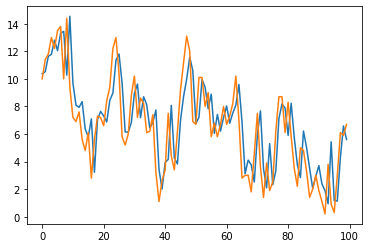

In [121]:
plot_predictions1(model3, X_test1, y_test1)